In [1]:
import os

directory = f'/Users/lilimatic/greenspace'
os.chdir(directory)

from sklearn.model_selection import train_test_split

#AUC and ROC curve 
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression



In [2]:
from functions.ml_data import *

/Users/lilimatic/greenspace/functions/ml_data.py:87: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.safety = df.physicalsafety.copy()


In [3]:
df_copy = df.copy()

In [4]:
y = 'safety'

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_copy.loc[:, df_copy.columns != y], \
                                                    df_copy[y], test_size=0.3)

KeyError: 'safety'

In [6]:
log_reg = LogisticRegression()

#Model fit 
log_reg.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [7]:
pred_prob = log_reg.predict_proba(X_test)

In [8]:
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

In [9]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [10]:
# auc scores

auc_score = roc_auc_score(y_test, pred_prob[:,1])

print(auc_score)

0.7999164578111947


In [11]:
# matplotlib
plt.style.use('seaborn')

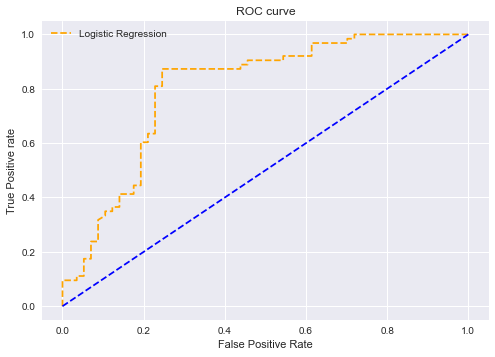

In [12]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();